In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,RobustScaler, StandardScaler
from sklearn import metrics
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew #for some statistics
from sklearn.decomposition import PCA

In [2]:
data = pd.read_csv("CS98XRegressionTrain.csv")

In [3]:
data.rename({'pop': 'popularity'}, axis=1, inplace=True)

In [4]:
data.duplicated().sum()

0

In [5]:
data.isnull().sum()

Id             0
title          0
artist         0
top genre     15
year           0
bpm            0
nrgy           0
dnce           0
dB             0
live           0
val            0
dur            0
acous          0
spch           0
popularity     0
dtype: int64

In [6]:
data['top genre'] = data['top genre'].fillna('unassigned')

In [7]:
data.isnull().sum()

Id            0
title         0
artist        0
top genre     0
year          0
bpm           0
nrgy          0
dnce          0
dB            0
live          0
val           0
dur           0
acous         0
spch          0
popularity    0
dtype: int64

In [8]:
data

,Id,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,popularity
0,1,My Happiness,Connie Francis,adult standards,1996,107,31,45,-8,13,28,150,75,3,44
1,2,Unchained Melody,The Teddy Bears,unassigned,2011,114,44,53,-8,13,47,139,49,3,37
2,3,How Deep Is Your Love,Bee Gees,adult standards,1979,105,36,63,-9,13,67,245,11,3,77
3,4,Woman in Love,Barbra Streisand,adult standards,1980,170,28,47,-16,13,33,232,25,3,67
4,5,Goodbye Yellow Brick Road - Remastered 2014,Elton John,glam rock,1973,121,47,56,-8,15,40,193,45,3,63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,449,But Not For Me,Ella Fitzgerald,adult standards,1959,80,22,18,-17,10,16,214,92,4,45
449,450,Surf City,Jan & Dean,brill building pop,2010,148,81,53,-13,23,96,147,50,3,50
450,451,Dilemma,Nelly,dance pop,2002,168,55,73,-8,20,61,289,23,14,77
451,452,It's Gonna Be Me,*NSYNC,boy band,2000,165,87,64,-5,6,88,191,5,8,62


In [9]:
data.shape

(453, 15)

<AxesSubplot:>

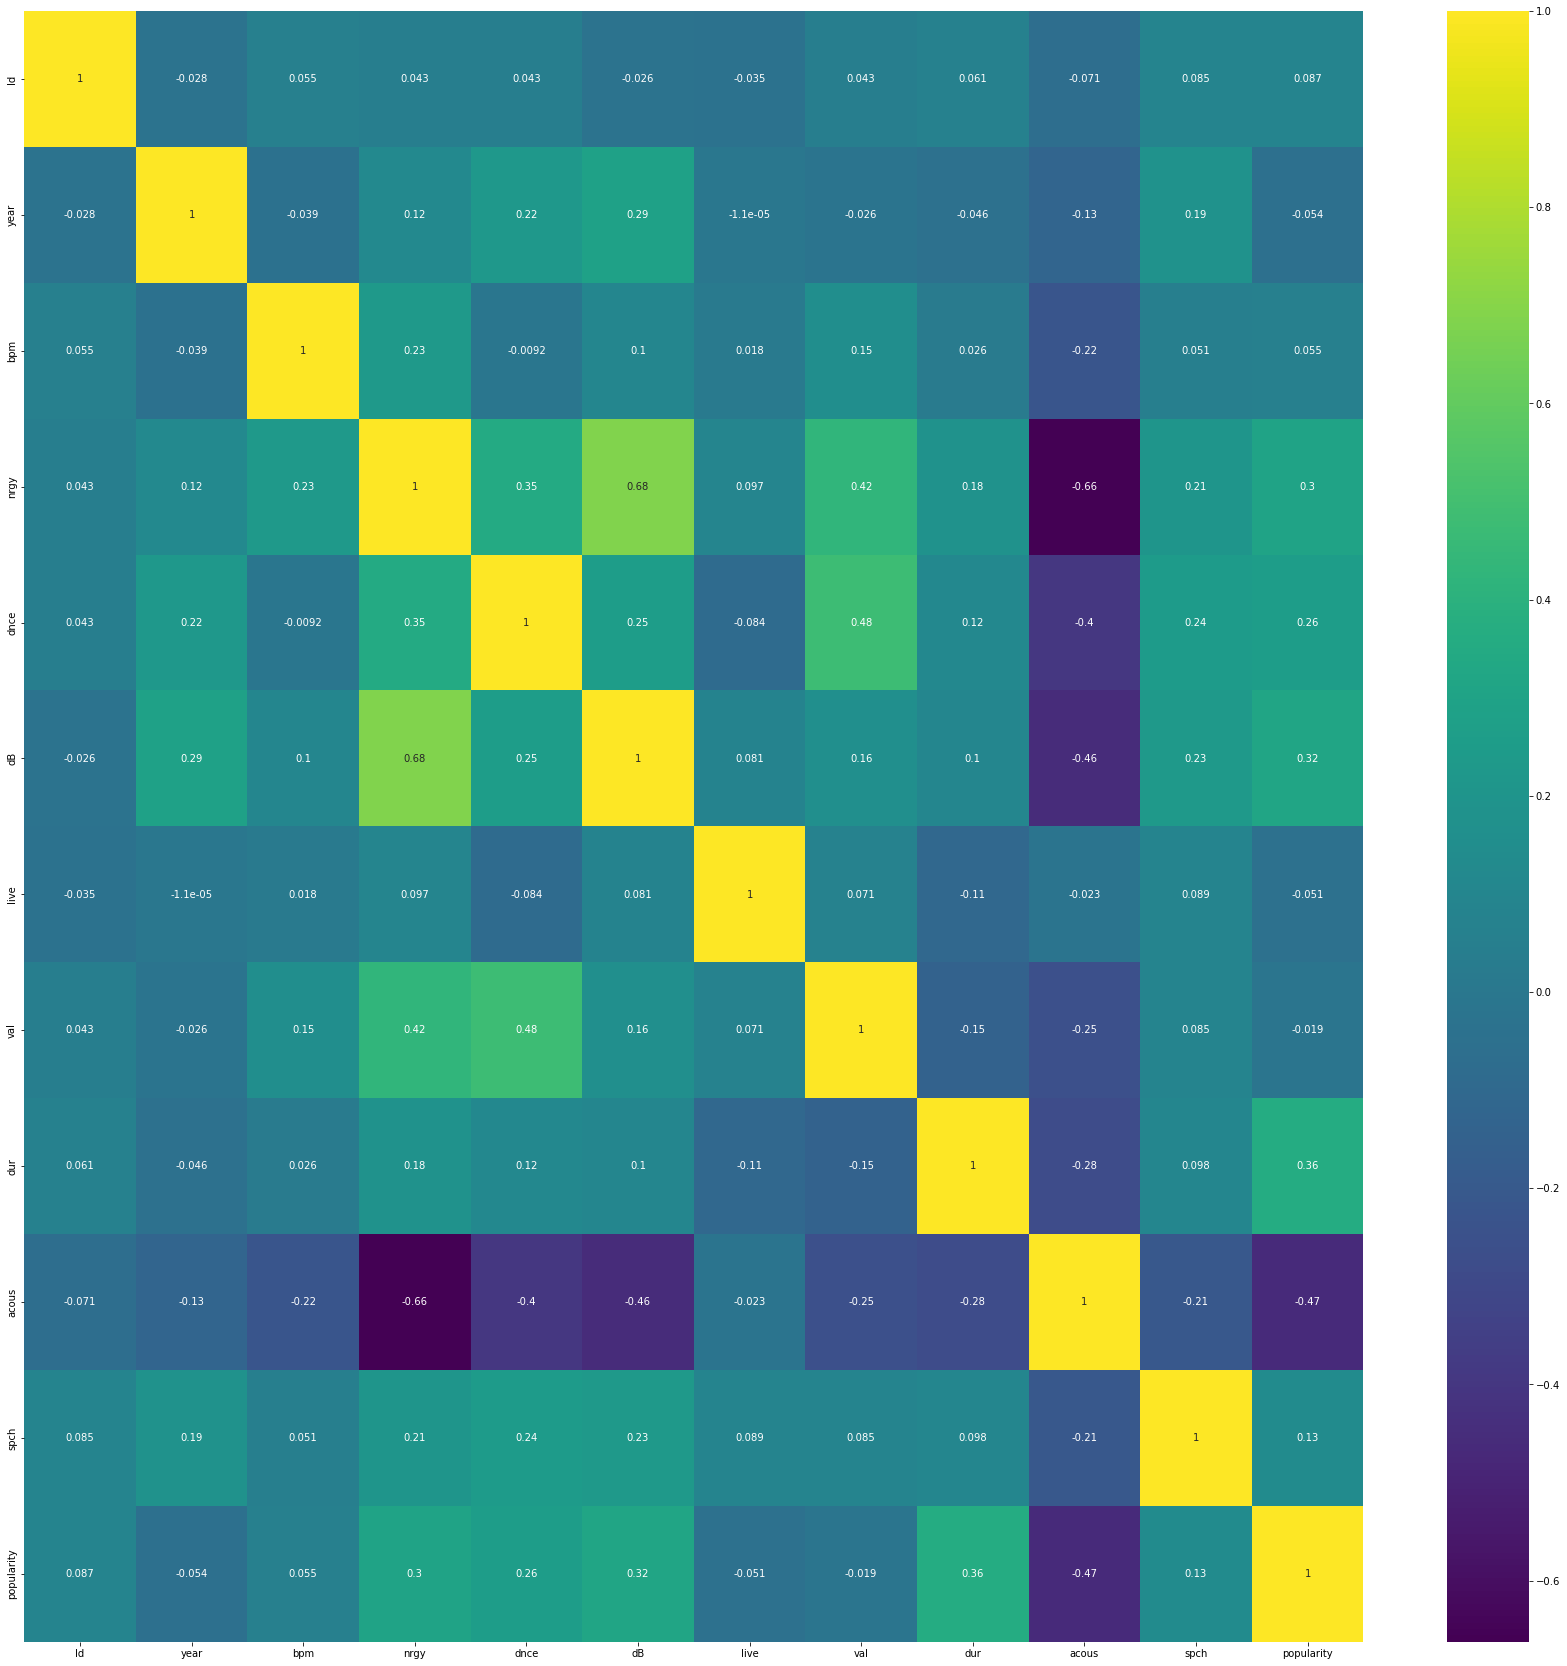

In [10]:
#Check the corelation 
plt.figure(figsize=(30,30))
sns.heatmap(data.corr(),annot=True,cmap='viridis')

In [11]:
#Low corelation to popularity live, val, spch bpm,year cna be removed

# Preprocessing and feature engineering


In [12]:
# data.drop(columns=['bpm','live','val','spch'],axis=1,inplace=True)

In [13]:
# #Duration seems to be in seconds, convert it to minutes
# data['dur'] = data['dur'].apply(lambda x: round(x/60,2))
# data.head()

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453 entries, 0 to 452
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Id          453 non-null    int64 
 1   title       453 non-null    object
 2   artist      453 non-null    object
 3   top genre   453 non-null    object
 4   year        453 non-null    int64 
 5   bpm         453 non-null    int64 
 6   nrgy        453 non-null    int64 
 7   dnce        453 non-null    int64 
 8   dB          453 non-null    int64 
 9   live        453 non-null    int64 
 10  val         453 non-null    int64 
 11  dur         453 non-null    int64 
 12  acous       453 non-null    int64 
 13  spch        453 non-null    int64 
 14  popularity  453 non-null    int64 
dtypes: int64(12), object(3)
memory usage: 53.2+ KB


In [15]:
data.drop(['Id','title'],axis=1,inplace=True)

In [16]:
data.describe()

,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,popularity
count,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000
mean,1991.443709,118.399558,60.070640,59.565121,-8.836645,17.757174,59.465784,226.278146,32.982340,5.660044,60.743929
std,16.776103,25.238713,22.205284,15.484458,3.577187,13.830300,24.539868,63.770380,29.530015,5.550581,13.470083
min,1948.000000,62.000000,7.000000,18.000000,-24.000000,2.000000,6.000000,98.000000,0.000000,2.000000,26.000000
25%,1976.000000,100.000000,43.000000,49.000000,-11.000000,9.000000,42.000000,181.000000,7.000000,3.000000,53.000000
50%,1994.000000,119.000000,63.000000,61.000000,-8.000000,13.000000,61.000000,223.000000,24.000000,4.000000,63.000000
75%,2007.000000,133.000000,78.000000,70.000000,-6.000000,23.000000,80.000000,262.000000,58.000000,6.000000,71.000000
max,2019.000000,199.000000,100.000000,96.000000,-1.000000,93.000000,99.000000,511.000000,100.000000,47.000000,84.000000


In [17]:
data

,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,popularity
0,Connie Francis,adult standards,1996,107,31,45,-8,13,28,150,75,3,44
1,The Teddy Bears,unassigned,2011,114,44,53,-8,13,47,139,49,3,37
2,Bee Gees,adult standards,1979,105,36,63,-9,13,67,245,11,3,77
3,Barbra Streisand,adult standards,1980,170,28,47,-16,13,33,232,25,3,67
4,Elton John,glam rock,1973,121,47,56,-8,15,40,193,45,3,63
...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,Ella Fitzgerald,adult standards,1959,80,22,18,-17,10,16,214,92,4,45
449,Jan & Dean,brill building pop,2010,148,81,53,-13,23,96,147,50,3,50
450,Nelly,dance pop,2002,168,55,73,-8,20,61,289,23,14,77
451,*NSYNC,boy band,2000,165,87,64,-5,6,88,191,5,8,62


In [18]:
data['top genre'].isna().values.sum()

0

In [19]:
# #Null values in top genre column delete it
# data.dropna(inplace=True)

In [20]:
data.shape

(453, 13)

In [21]:
data

,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,popularity
0,Connie Francis,adult standards,1996,107,31,45,-8,13,28,150,75,3,44
1,The Teddy Bears,unassigned,2011,114,44,53,-8,13,47,139,49,3,37
2,Bee Gees,adult standards,1979,105,36,63,-9,13,67,245,11,3,77
3,Barbra Streisand,adult standards,1980,170,28,47,-16,13,33,232,25,3,67
4,Elton John,glam rock,1973,121,47,56,-8,15,40,193,45,3,63
...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,Ella Fitzgerald,adult standards,1959,80,22,18,-17,10,16,214,92,4,45
449,Jan & Dean,brill building pop,2010,148,81,53,-13,23,96,147,50,3,50
450,Nelly,dance pop,2002,168,55,73,-8,20,61,289,23,14,77
451,*NSYNC,boy band,2000,165,87,64,-5,6,88,191,5,8,62


In [22]:
#Split genre
genre = (data["top genre"].str.strip()).str.lower()
gen = genre.str.split(" ",0)
new_genre = []
for i in gen:
    new_genre.append(i[-1])
new_genre=np.array(new_genre)
data['genre'] = new_genre.tolist()
data.drop(columns=['top genre'],axis=1,inplace=True)

In [23]:
data['genre'].value_counts()

rock             118
pop              107
standards         74
hop               16
unassigned        15
europop           14
soul              12
band              11
dance              9
invasion           8
disco              7
eurodance          6
blues              4
house              4
doo-wop            4
folk               4
funk               4
metal              4
chanson            2
bebop              2
merseybeat         2
room               2
wave               2
rap                2
country            1
hi-nrg             1
group              1
yodeling           1
afropop            1
trance             1
gold               1
jazz               1
revival            1
comedy             1
latin              1
boogaloo           1
r&b                1
afrobeat           1
garage             1
mellow             1
show               1
britpop            1
rock-and-roll      1
punk               1
Name: genre, dtype: int64

In [24]:
v = data['genre'].value_counts()
data.loc[data['genre'].isin(v[v<3].index), 'genre'] = 'others'

In [25]:
data.isna().sum()


artist        0
year          0
bpm           0
nrgy          0
dnce          0
dB            0
live          0
val           0
dur           0
acous         0
spch          0
popularity    0
genre         0
dtype: int64

In [26]:
# data['genre'].unique()

In [27]:
data

,artist,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,popularity,genre
0,Connie Francis,1996,107,31,45,-8,13,28,150,75,3,44,standards
1,The Teddy Bears,2011,114,44,53,-8,13,47,139,49,3,37,unassigned
2,Bee Gees,1979,105,36,63,-9,13,67,245,11,3,77,standards
3,Barbra Streisand,1980,170,28,47,-16,13,33,232,25,3,67,standards
4,Elton John,1973,121,47,56,-8,15,40,193,45,3,63,rock
...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,Ella Fitzgerald,1959,80,22,18,-17,10,16,214,92,4,45,standards
449,Jan & Dean,2010,148,81,53,-13,23,96,147,50,3,50,pop
450,Nelly,2002,168,55,73,-8,20,61,289,23,14,77,pop
451,*NSYNC,2000,165,87,64,-5,6,88,191,5,8,62,band


In [28]:
# #Lable encode genre
# from sklearn.preprocessing import LabelEncoder

# #create instance of label encoder
# lab = LabelEncoder()
# data['artist'] = lab.fit_transform(data['artist'])
# # data.drop(columns=['top genre'],axis=1,inplace=True)

In [29]:
# #one hot
# from sklearn.preprocessing import OneHotEncoder
# onehot = OneHotEncoder(handle_unknown="ignore")
# genre_array = onehot.fit_transform(data[['genre']]).toarray()
# genre_label = np.array(onehot.categories_).ravel()
# genre_split = pd.DataFrame(genre_array, columns=genre_label)
# data = pd.concat([data,genre_split],axis=1)
# data.drop(['genre'], axis=1, inplace=True)
# # ohe = OneHotEncoder(handle_unknown='ignore')
# # ohe_columns = pd.DataFrame(ohe.fit_transform(data[["genre"]]).toarray())

In [30]:
#Artist one hot
count = data['artist'].value_counts()

data['value_count'] = data['artist'].apply(lambda x: count[x])
data['artist'] = data['value_count'].apply(lambda x: round(x/7,2))
data.drop(columns=['value_count'],axis=1,inplace=True)

In [31]:
data.columns

Index(['artist', 'year', 'bpm', 'nrgy', 'dnce', 'dB', 'live', 'val', 'dur',
       'acous', 'spch', 'popularity', 'genre'],
      dtype='object')

In [32]:
data['dur'] = np.log2(data['dur'])

In [33]:
data['nrgy'] = np.log2(data['nrgy'])

In [34]:
data['bpm'] = np.log2(data['bpm'])

In [35]:
data

,artist,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,popularity,genre
0,0.14,1996,6.741467,4.954196,45,-8,13,28,7.228819,75,3,44,standards
1,0.29,2011,6.832890,5.459432,53,-8,13,47,7.118941,49,3,37,unassigned
2,0.14,1979,6.714246,5.169925,63,-9,13,67,7.936638,11,3,77,standards
3,0.43,1980,7.409391,4.807355,47,-16,13,33,7.857981,25,3,67,standards
4,1.29,1973,6.918863,5.554589,56,-8,15,40,7.592457,45,3,63,rock
...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,0.29,1959,6.321928,4.459432,18,-17,10,16,7.741467,92,4,45,standards
449,0.29,2010,7.209453,6.339850,53,-13,23,96,7.199672,50,3,50,pop
450,0.14,2002,7.392317,5.781360,73,-8,20,61,8.174926,23,14,77,pop
451,0.14,2000,7.366322,6.442943,64,-5,6,88,7.577429,5,8,62,band


In [36]:

# data_train[scl_attr] = std_scaler.fit_transform(data_train[scl_attr])

# scaler = RobustScaler()
# robust_df = scaler.fit(data[scl_attr])
# robust_df_scaled = scaler.transform(data[scl_attr])
# data[scl_attr] = pd.DataFrame(robust_df_scaled)
scl_attr = ['artist','year', 'bpm', 'nrgy', 'dnce','spch','live', 'dB', 'val', 'dur',
       'acous']
scaler = StandardScaler()
std_df = scaler.fit(data[scl_attr])
std_df_scaled = scaler.transform(data[scl_attr])
data[scl_attr] = pd.DataFrame(std_df_scaled)

In [37]:
data

,artist,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,popularity,genre
0,-0.534855,0.271894,-0.361929,-1.155897,-0.941668,0.234142,-0.344348,-1.283649,-1.331032,1.424453,-0.479767,44,standards
1,0.072793,1.167012,-0.068838,-0.440587,-0.424450,0.234142,-0.344348,-0.508542,-1.603277,0.543019,-0.479767,37,unassigned
2,-0.534855,-0.742572,-0.449197,-0.850469,0.222073,-0.045716,-0.344348,0.307359,0.422738,-0.745230,-0.479767,77,standards
3,0.639930,-0.682898,1.779353,-1.363794,-0.812364,-2.004725,-0.344348,-1.079673,0.227849,-0.270612,-0.479767,67,standards
4,4.123776,-1.100619,0.206782,-0.305864,-0.230493,0.234142,-0.199578,-0.794108,-0.430042,0.407414,-0.479767,63,rock
...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,0.072793,-1.936062,-1.706919,-1.856383,-2.687280,-2.284583,-0.561503,-1.773190,-0.060839,2.000775,-0.299406,45,standards
449,0.072793,1.107337,1.138378,0.805905,-0.424450,-1.165150,0.379502,1.490416,-1.403248,0.576921,-0.479767,50,pop
450,-0.534855,0.629941,1.724618,0.015197,0.868596,0.234142,0.162347,0.062588,1.013146,-0.338414,1.504199,77,pop
451,-0.534855,0.510592,1.641280,0.951864,0.286725,1.073717,-0.851043,1.164055,-0.467278,-0.948637,0.422036,62,band


In [38]:
pca = PCA(n_components=5)
x_pca = pca.fit_transform(data[scl_attr])

In [39]:
x_data = data[[]]

In [40]:
data = pd.concat([data[['popularity','genre']].reset_index(drop=True), pd.DataFrame(x_pca)], axis='columns')

In [41]:
data

,popularity,genre,0,1,2,3,4
0,44,standards,2.207520,0.628305,0.937517,0.327499,-0.536826
1,37,unassigned,0.891183,0.832997,0.804072,0.085239,-0.164374
2,77,standards,0.177648,-0.217055,-0.407882,-0.705013,-0.083087
3,67,standards,1.906509,-1.029119,-1.300254,0.085077,-1.420076
4,63,rock,1.076820,-2.285046,-1.343157,0.637882,2.211893
...,...,...,...,...,...,...,...
448,45,standards,5.051076,-0.908199,-0.004460,0.188044,-0.056357
449,50,pop,-0.016602,1.901090,-0.927732,0.090485,-0.191656
450,77,pop,-1.567784,-0.045360,0.426067,0.028704,-1.236611
451,62,band,-2.194725,0.700417,-0.608509,-0.325197,-1.221644


In [42]:
#onehot 2
oh = OneHotEncoder(handle_unknown='ignore')
oh_genre = pd.DataFrame(oh.fit_transform(data[["genre"]]).toarray())
data = pd.concat([data.reset_index(drop=True), pd.DataFrame(oh_genre)], axis='columns')
data.drop(columns='genre',inplace=True)


In [43]:
# y = pd.DataFrame(data.loc[:,"popularity"])
# x = pd.DataFrame([data.loc[:,"year"], 
#                                  data.loc[:,"dnce"],
#                                  data.loc[:,"dB"],
#                                 data.loc[:,"dur"],
#                                 data.loc[:,"acous"]]).T.join(oh_genre)

x= data.loc[:, data.columns != 'popularity']
# data_train.drop(columns=['artist'],inplace=True)
# x= (data_train.loc[:, data_train.columns != 'top genre']).T.join(oh_artist)
y = data[['popularity']]

In [44]:
x

,0,1,2,3,4,0,1,2,3,4,...,9,10,11,12,13,14,15,16,17,18
0,2.207520,0.628305,0.937517,0.327499,-0.536826,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.891183,0.832997,0.804072,0.085239,-0.164374,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.177648,-0.217055,-0.407882,-0.705013,-0.083087,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.906509,-1.029119,-1.300254,0.085077,-1.420076,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.076820,-2.285046,-1.343157,0.637882,2.211893,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,5.051076,-0.908199,-0.004460,0.188044,-0.056357,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
449,-0.016602,1.901090,-0.927732,0.090485,-0.191656,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
450,-1.567784,-0.045360,0.426067,0.028704,-1.236611,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
451,-2.194725,0.700417,-0.608509,-0.325197,-1.221644,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
# #dymmy
# data  = pd.get_dummies(data, prefix="genre",  columns=["genre"])
# # data_test.drop(columns=['genre'],axis=1,inplace=True)

In [46]:
data.isna().sum()

popularity    0
0             0
1             0
2             0
3             0
4             0
0             0
1             0
2             0
3             0
4             0
5             0
6             0
7             0
8             0
9             0
10            0
11            0
12            0
13            0
14            0
15            0
16            0
17            0
18            0
dtype: int64

In [47]:
# from category_encoders import LeaveOneOutEncoder
# enc = TargetEncoder()
# data['genre'] = enc.fit_transform(data['genre'])
x

,0,1,2,3,4,0,1,2,3,4,...,9,10,11,12,13,14,15,16,17,18
0,2.207520,0.628305,0.937517,0.327499,-0.536826,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.891183,0.832997,0.804072,0.085239,-0.164374,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.177648,-0.217055,-0.407882,-0.705013,-0.083087,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.906509,-1.029119,-1.300254,0.085077,-1.420076,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.076820,-2.285046,-1.343157,0.637882,2.211893,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,5.051076,-0.908199,-0.004460,0.188044,-0.056357,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
449,-0.016602,1.901090,-0.927732,0.090485,-0.191656,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
450,-1.567784,-0.045360,0.426067,0.028704,-1.236611,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
451,-2.194725,0.700417,-0.608509,-0.325197,-1.221644,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
# data.dropna(inplace=True)

In [49]:
#drop artist
# data.drop(columns=['artist'],axis=1,inplace=True)
# data

In [50]:
# from sklearn.model_selection import train_test_split
# x = data.loc[:, data.columns != 'popularity']
# y = data[['popularity']]
# # x_train, x_test,y_train,y_test = train_test_split(X,y,test_size =0.3)
# # # print the data
# # x_train

# Linear regression

In [51]:
#Linear Reg
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(x,y)

LinearRegression()

In [52]:
print(clf.score(x,y))

0.43206351662283105


In [53]:
y_train_pred = clf.predict(x)
rmse = metrics.mean_squared_error(y, y_train_pred, squared=False)
print(rmse)

10.14005399814071


In [54]:
clf.predict(x)

array([[51.13773566],
       [38.87943735],
       [60.90464645],
       [58.03617064],
       [71.94019193],
       [65.98048499],
       [63.93998809],
       [65.075325  ],
       [29.77127595],
       [47.56978931],
       [63.00788234],
       [81.39805467],
       [57.52179829],
       [44.52942557],
       [53.42353597],
       [51.68125242],
       [59.80091211],
       [61.00999677],
       [59.04069804],
       [61.02491827],
       [61.38307177],
       [62.33061176],
       [65.42614406],
       [60.00384042],
       [49.01235783],
       [61.75613321],
       [32.10602763],
       [56.24641221],
       [49.17630312],
       [69.14045788],
       [65.02319955],
       [67.87044364],
       [61.09008338],
       [69.28307624],
       [50.8759049 ],
       [45.57322809],
       [65.56661457],
       [68.76735255],
       [63.68032383],
       [73.97412587],
       [65.23993424],
       [64.95319276],
       [53.3797617 ],
       [66.21717694],
       [58.18921763],
       [65

# Decision tree

In [55]:
from sklearn.tree import DecisionTreeRegressor 
  
# create a regressor object
dtr = DecisionTreeRegressor(random_state = 0) 
  
# fit the regressor with X and Y data
# dtr.fit(X, y)
dtr.fit(x,y)

DecisionTreeRegressor(random_state=0)

In [56]:
print(dtr.score(x,y))

1.0


In [57]:
y_train_pred = dtr.predict(x)
rmse = metrics.mean_squared_error(y, y_train_pred, squared=False)
print(rmse)

0.0


# Random Forest

In [58]:
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(x,y);

/tmp/ipykernel_86373/787884529.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x,y);


In [59]:
print(rf.score(x,y))

0.9155704620755731


In [60]:
y_train_pred = rf.predict(x)
rmse = metrics.mean_squared_error(y, y_train_pred, squared=False)
print(rmse)

3.9096473870349517


In [61]:
rf.predict(x)

array([45.86 , 39.794, 72.224, 65.769, 65.765, 73.08 , 52.593, 69.578,
       34.595, 36.803, 65.244, 70.307, 40.805, 39.434, 52.604, 43.581,
       50.776, 65.563, 58.237, 71.676, 71.232, 68.337, 64.187, 64.095,
       43.852, 61.757, 32.961, 58.273, 56.161, 70.466, 74.196, 70.59 ,
       63.471, 70.888, 70.374, 33.786, 66.138, 49.095, 69.568, 65.3  ,
       59.796, 70.421, 59.618, 66.663, 61.318, 62.643, 59.618, 72.194,
       69.379, 73.772, 59.588, 61.273, 60.459, 62.696, 67.177, 39.237,
       68.557, 35.358, 69.216, 67.93 , 66.465, 55.665, 73.492, 47.327,
       66.268, 69.494, 67.384, 50.373, 37.53 , 74.293, 63.963, 73.465,
       31.855, 49.592, 71.737, 70.123, 62.972, 49.158, 43.31 , 65.988,
       48.997, 39.546, 67.626, 44.02 , 61.363, 65.654, 69.842, 38.815,
       55.251, 69.883, 34.269, 62.838, 69.063, 49.431, 74.779, 52.243,
       54.719, 70.04 , 39.151, 68.556, 57.471, 66.214, 58.536, 50.42 ,
       50.39 , 47.143, 68.546, 47.465, 71.245, 59.375, 68.876, 60.261,
      

# Test data

In [62]:
data_test = pd.read_csv("CS98XRegressionTest.csv")


In [63]:
data_test.isna().sum()

Id           0
title        0
artist       0
top genre    1
year         0
bpm          0
nrgy         0
dnce         0
dB           0
live         0
val          0
dur          0
acous        0
spch         0
dtype: int64

In [64]:
data_test['top genre'] = data_test['top genre'].fillna('unassigned')

In [65]:
data_test.isna().sum()

Id           0
title        0
artist       0
top genre    0
year         0
bpm          0
nrgy         0
dnce         0
dB           0
live         0
val          0
dur          0
acous        0
spch         0
dtype: int64

In [66]:
data_test

,Id,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch
0,454,Pump It,The Black Eyed Peas,dance pop,2005,154,93,65,-3,75,74,213,1,18
1,455,"Circle of Life - From ""The Lion King""/Soundtra...",Elton John,glam rock,1994,161,39,30,-15,11,14,292,26,3
2,456,We Are The Champions - Remastered 2011,Queen,glam rock,1977,64,46,27,-7,12,18,179,38,3
3,457,Insomnia - Radio Edit,Faithless,big beat,2010,127,92,71,-9,37,53,216,6,4
4,458,This Eve of Parting,John Hartford,appalachian folk,2018,115,46,56,-12,21,34,153,18,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,563,Candy Shop,50 Cent,east coast hip hop,2005,125,57,61,-8,38,76,209,3,47
110,564,Dragostea Din Tei - Italian Version,O-Zone,bubblegum dance,2010,130,89,67,-6,10,80,215,4,3
111,565,Big Poppa - 2005 Remaster,The Notorious B.I.G.,east coast hip hop,1994,84,58,78,-7,14,76,253,43,27
112,566,YMCA - Original Version 1978,Village People,disco,1978,127,97,72,-5,12,73,287,6,14


In [67]:
data_test.rename({'pop': 'popularity'}, axis=1, inplace=True)
# data_test.drop(columns=['bpm','live','val','spch'],axis=1,inplace=True)
data_test.drop(['Id','title'],axis=1,inplace=True)

In [68]:
data_test['dur'] = np.log2(data_test['dur'])

In [69]:
data_test['nrgy'] = np.log2(data_test['nrgy'])

In [70]:
data_test['bpm'] = np.log2(data_test['bpm'])

In [71]:
genre = (data_test["top genre"].str.strip()).str.lower()
gen = genre.str.split(" ",0)
new_genre = []
for i in gen:
    new_genre.append(i[-1])
new_genre=np.array(new_genre)
data_test['genre'] = new_genre.tolist()
data_test.drop(columns=['top genre'],axis=1,inplace=True)

In [72]:
v = data_test['genre'].value_counts()
data_test.loc[data_test['genre'].isin(v[v<3].index), 'genre'] = 'others'

In [73]:
count = data_test['artist'].value_counts()

data_test['value_count'] = data_test['artist'].apply(lambda x: count[x])
data_test['artist'] = data_test['value_count'].apply(lambda x: round(x/7,2))
data_test.drop(columns=['value_count'],axis=1,inplace=True)

In [74]:
data_test

,artist,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,genre
0,0.14,2005,7.266787,6.539159,65,-3,75,74,7.734710,1,18,pop
1,0.43,1994,7.330917,5.285402,30,-15,11,14,8.189825,26,3,rock
2,0.57,1977,6.000000,5.523562,27,-7,12,18,7.483816,38,3,rock
3,0.14,2010,6.988685,6.523562,71,-9,37,53,7.754888,6,4,others
4,0.14,2018,6.845490,5.523562,56,-12,21,34,7.257388,18,3,others
...,...,...,...,...,...,...,...,...,...,...,...,...
109,0.14,2005,6.965784,5.832890,61,-8,38,76,7.707359,3,47,hop
110,0.14,2010,7.022368,6.475733,67,-6,10,80,7.748193,4,3,dance
111,0.29,1994,6.392317,5.857981,78,-7,14,76,7.982994,43,27,hop
112,0.14,1978,6.988685,6.599913,72,-5,12,73,8.164907,6,14,disco


In [75]:
std_df_scaled_t = scaler.transform(data_test[scl_attr])
data_test[scl_attr] = pd.DataFrame(std_df_scaled_t)

In [76]:
data_test

,artist,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,genre
0,-0.534855,0.808965,1.322181,1.088085,0.351377,1.633434,4.143519,0.592924,-0.077582,-1.084243,2.225641,pop
1,0.639930,0.152545,1.527775,-0.686977,-1.911453,-1.724866,-0.489118,-1.854780,1.050061,-0.236710,-0.479767,rock
2,1.207068,-0.861921,-2.738981,-0.349792,-2.105410,0.514000,-0.416733,-1.691599,-0.699223,0.170105,-0.479767,rock
3,-0.534855,1.107337,0.430621,1.066003,0.739291,-0.045716,1.392891,-0.263772,-0.027587,-0.914736,-0.299406,others
4,-0.534855,1.584733,-0.028443,-0.349792,-0.230493,-0.885291,0.234732,-1.038878,-1.260246,-0.507921,-0.479767,others
...,...,...,...,...,...,...,...,...,...,...,...,...
109,-0.534855,0.808965,0.357205,0.088153,0.092768,0.234142,1.465276,0.674514,-0.145348,-1.016440,7.456095,hop
110,-0.534855,1.107337,0.538605,0.998288,0.480682,0.793859,-0.561503,0.837695,-0.044174,-0.982539,-0.479767,dance
111,0.072793,0.152545,-1.481259,0.123677,1.191857,0.514000,-0.271963,0.674514,0.537594,0.339612,3.848885,hop
112,-0.534855,-0.802247,0.430621,1.174101,0.803943,1.073717,-0.416733,0.552129,0.988322,-0.914736,1.504199,disco


In [77]:
xtest_pca = pca.transform(data_test[scl_attr])

In [78]:
data_test = pd.concat([data_test[['genre']].reset_index(drop=True), pd.DataFrame(xtest_pca)], axis='columns')

In [79]:
data_test

,genre,0,1,2,3,4
0,pop,-3.099386,1.712066,0.736146,3.651921,0.407580
1,rock,1.864105,-1.988405,-0.400442,0.761958,-1.978535
2,rock,2.268015,-1.468468,0.921335,0.917714,1.384738
3,others,-1.408465,0.572316,0.375566,0.870166,-0.196337
4,others,0.726359,0.816336,1.095722,0.220215,-0.721940
...,...,...,...,...,...,...
109,hop,-2.792882,1.576403,3.160763,1.418422,-0.060258
110,dance,-1.872606,0.381461,-0.016630,-0.503757,-0.632690
111,hop,-1.456412,0.280807,2.211018,-0.893350,1.322141
112,disco,-2.361944,-0.431816,-0.174613,-0.255724,-0.391360


In [80]:
# #dummy encoding
# dummies = pd.get_dummies(data_test['genre'], prefix='genre')
# data_test = pd.concat([data_test, dummies], axis=1)
# data_test.drop(columns='genre',axis=1,inplace=True)

In [81]:
# #one hot
# # from sklearn.preprocessing import OneHotEncoder
# # onehott = OneHotEncoder(handle_unknown="ignore")
# genre_array = onehot.fit_transform(data_test[['genre']]).toarray()
# genre_label = np.array(onehot.categories_).ravel()
# genre_split = pd.DataFrame(genre_array, columns=genre_label)
# data_test = pd.concat([data_test,genre_split],axis=1)
# data_test.drop(['genre'], axis=1, inplace=True)


# genre_array = onehot.transform(data_test[['genre']]).toarray()
# genre_label = np.array(onehot.categories_).ravel()
# genre_split = pd.DataFrame(genre_array, columns=genre_label)
# data_test = pd.concat([data_test,genre_split],axis=1)
# data_test.drop(['genre'], axis=1, inplace=True)

In [82]:
data_test

,genre,0,1,2,3,4
0,pop,-3.099386,1.712066,0.736146,3.651921,0.407580
1,rock,1.864105,-1.988405,-0.400442,0.761958,-1.978535
2,rock,2.268015,-1.468468,0.921335,0.917714,1.384738
3,others,-1.408465,0.572316,0.375566,0.870166,-0.196337
4,others,0.726359,0.816336,1.095722,0.220215,-0.721940
...,...,...,...,...,...,...
109,hop,-2.792882,1.576403,3.160763,1.418422,-0.060258
110,dance,-1.872606,0.381461,-0.016630,-0.503757,-0.632690
111,hop,-1.456412,0.280807,2.211018,-0.893350,1.322141
112,disco,-2.361944,-0.431816,-0.174613,-0.255724,-0.391360


In [83]:
oh_genre_t = pd.DataFrame(oh.transform(data_test[["genre"]]).toarray())
data_test = pd.concat([data_test.reset_index(drop=True), pd.DataFrame(oh_genre_t)], axis='columns')


In [84]:
data_test.drop(columns='genre',inplace=True)

In [85]:
#onehot2


data_test

,0,1,2,3,4,0,1,2,3,4,...,9,10,11,12,13,14,15,16,17,18
0,-3.099386,1.712066,0.736146,3.651921,0.407580,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.864105,-1.988405,-0.400442,0.761958,-1.978535,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2.268015,-1.468468,0.921335,0.917714,1.384738,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,-1.408465,0.572316,0.375566,0.870166,-0.196337,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.726359,0.816336,1.095722,0.220215,-0.721940,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,-2.792882,1.576403,3.160763,1.418422,-0.060258,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
110,-1.872606,0.381461,-0.016630,-0.503757,-0.632690,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
111,-1.456412,0.280807,2.211018,-0.893350,1.322141,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
112,-2.361944,-0.431816,-0.174613,-0.255724,-0.391360,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [86]:
# data_test = pd.DataFrame([data_test.loc[:,"year"], 
#                                  data_test.loc[:,"dnce"],
#                                  data_test.loc[:,"dB"],
#                                 data_test.loc[:,"dur"],
#                                 data_test.loc[:,"acous"]]).T.join(oh_genre_t)

In [87]:
data_test

,0,1,2,3,4,0,1,2,3,4,...,9,10,11,12,13,14,15,16,17,18
0,-3.099386,1.712066,0.736146,3.651921,0.407580,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.864105,-1.988405,-0.400442,0.761958,-1.978535,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2.268015,-1.468468,0.921335,0.917714,1.384738,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,-1.408465,0.572316,0.375566,0.870166,-0.196337,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.726359,0.816336,1.095722,0.220215,-0.721940,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,-2.792882,1.576403,3.160763,1.418422,-0.060258,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
110,-1.872606,0.381461,-0.016630,-0.503757,-0.632690,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
111,-1.456412,0.280807,2.211018,-0.893350,1.322141,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
112,-2.361944,-0.431816,-0.174613,-0.255724,-0.391360,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [88]:
# data_test  = pd.get_dummies(data_test, prefix="genre",  columns=["genre"])
# # data_test.drop(columns=['genre'],axis=1,inplace=True)

In [89]:
# #Lable encode genre
# from sklearn.preprocessing import LabelEncoder

# #create instance of label encoder
# lab = LabelEncoder()
# data_test['genre'] = lab.fit_transform(data_test['genre'])
# # data_test.drop(columns=['top genre'],axis=1,inplace=True)

In [90]:
# data_test.drop(columns=['artist'],axis=1,inplace=True)


In [91]:
type(data_test)

pandas.core.frame.DataFrame

In [92]:
# data_test = x_train.align(data_test, join='inner', axis=1)

In [93]:
# data_test = pd.DataFrame(data_test)

In [94]:
data_test

,0,1,2,3,4,0,1,2,3,4,...,9,10,11,12,13,14,15,16,17,18
0,-3.099386,1.712066,0.736146,3.651921,0.407580,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.864105,-1.988405,-0.400442,0.761958,-1.978535,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2.268015,-1.468468,0.921335,0.917714,1.384738,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,-1.408465,0.572316,0.375566,0.870166,-0.196337,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.726359,0.816336,1.095722,0.220215,-0.721940,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,-2.792882,1.576403,3.160763,1.418422,-0.060258,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
110,-1.872606,0.381461,-0.016630,-0.503757,-0.632690,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
111,-1.456412,0.280807,2.211018,-0.893350,1.322141,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
112,-2.361944,-0.431816,-0.174613,-0.255724,-0.391360,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [95]:
# data_test = data_test.reindex(labels=x.columns,axis=1)

In [96]:
# data_test

In [97]:
# data_test= data_test.fillna(0.0)

In [98]:
spotify_pred = clf.predict(data_test)

In [99]:
spotify_pred

array([[62.13927911],
       [64.21134681],
       [64.45312869],
       [59.6855252 ],
       [52.45644648],
       [62.94496754],
       [57.20119214],
       [46.59189152],
       [61.8782489 ],
       [67.01954615],
       [52.94566069],
       [68.17467996],
       [54.53304378],
       [58.73518449],
       [67.73954217],
       [66.32472257],
       [58.72000096],
       [62.30355731],
       [63.66572526],
       [62.59631399],
       [55.25008436],
       [57.64095375],
       [51.39801221],
       [48.65205995],
       [52.56844985],
       [67.44359402],
       [62.72670326],
       [58.36018557],
       [51.16038255],
       [65.53002173],
       [67.60110649],
       [52.37564425],
       [66.50712759],
       [64.77252925],
       [65.01636227],
       [65.21719754],
       [63.03725103],
       [54.48000872],
       [60.90090352],
       [64.81227643],
       [62.75899225],
       [65.23144836],
       [66.28790204],
       [53.79534808],
       [56.10195574],
       [59

In [100]:
spotify_pred = rf.predict(data_test)

In [101]:
spotify_pred

array([61.133, 64.789, 64.959, 63.731, 44.438, 64.554, 64.725, 41.163,
       66.329, 63.266, 43.555, 66.489, 52.171, 62.097, 60.988, 63.361,
       63.557, 64.617, 69.353, 64.507, 61.838, 58.15 , 52.42 , 51.24 ,
       46.83 , 64.974, 65.111, 62.364, 40.973, 69.634, 71.339, 47.029,
       69.648, 68.037, 65.152, 66.42 , 69.47 , 60.851, 65.115, 64.505,
       67.304, 65.664, 66.46 , 41.422, 65.352, 56.2  , 67.889, 64.745,
       65.373, 62.481, 48.993, 67.332, 66.391, 51.736, 60.998, 64.298,
       68.009, 55.584, 68.746, 50.981, 62.858, 66.335, 61.473, 65.103,
       65.597, 65.549, 61.696, 61.875, 64.565, 64.726, 67.603, 42.713,
       54.902, 69.493, 63.633, 70.849, 68.404, 55.596, 68.98 , 54.402,
       63.637, 61.74 , 44.356, 66.42 , 48.415, 63.271, 68.717, 64.055,
       43.038, 65.661, 37.588, 64.532, 64.324, 63.413, 63.274, 68.374,
       63.515, 59.078, 64.462, 43.709, 53.539, 64.248, 65.181, 43.85 ,
       39.255, 66.27 , 61.604, 64.607, 54.449, 60.194, 61.72 , 67.1  ,
      

In [102]:
data_sub = pd.read_csv("CS98XRegressionTest.csv")
spotify_submit = pd.DataFrame([data_sub.loc[:,"Id"]]).T

In [103]:
spotify_submit.size

114

In [104]:
spotify_submit['pop'] = pd.DataFrame(spotify_pred.round().astype(int))

In [105]:
spotify_submit.to_csv('spotify_submit_preds_rf.csv',index=False)

In [106]:
spotify_submit

,Id,pop
0,454,61
1,455,65
2,456,65
3,457,64
4,458,44
...,...,...
109,563,60
110,564,62
111,565,67
112,566,64


<AxesSubplot:>

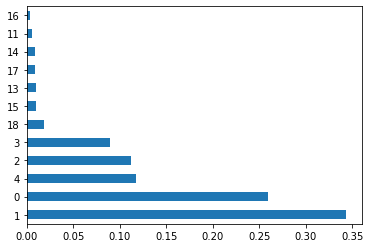

In [107]:
feat_importances = pd.Series(rf.feature_importances_, index=data_test.columns)
feat_importances.nlargest(12).plot(kind='barh')